# Importando a base de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emd
from scipy.signal import hilbert

In [2]:
sorriso = pd.read_excel(r'C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Series_Precos\Sorriso_jan21-set24.xlsx')

sorriso.set_index(sorriso['Data'], drop=False, inplace=True)
sorriso.drop(columns=['Data', 'Cidade', 'Unidade'], inplace=True)
sorriso.rename({'Valor': 'Preco'}, axis=1, inplace=True)

sorriso.head()

,Preco
Data,
2021-01-11,151.193366
2021-01-12,152.695531
2021-01-13,148.774896
2021-01-14,148.430713
2021-01-15,149.769147


## Retornos

In [3]:
sorriso['Retornos'] = sorriso['Preco'].pct_change()
sorriso.dropna(subset=['Retornos'], inplace=True)
sorriso.head(2)

,Preco,Retornos
Data,,
2021-01-12,152.695531,0.009935
2021-01-13,148.774896,-0.025676


# Extração de fases

## Hilbert-Huang

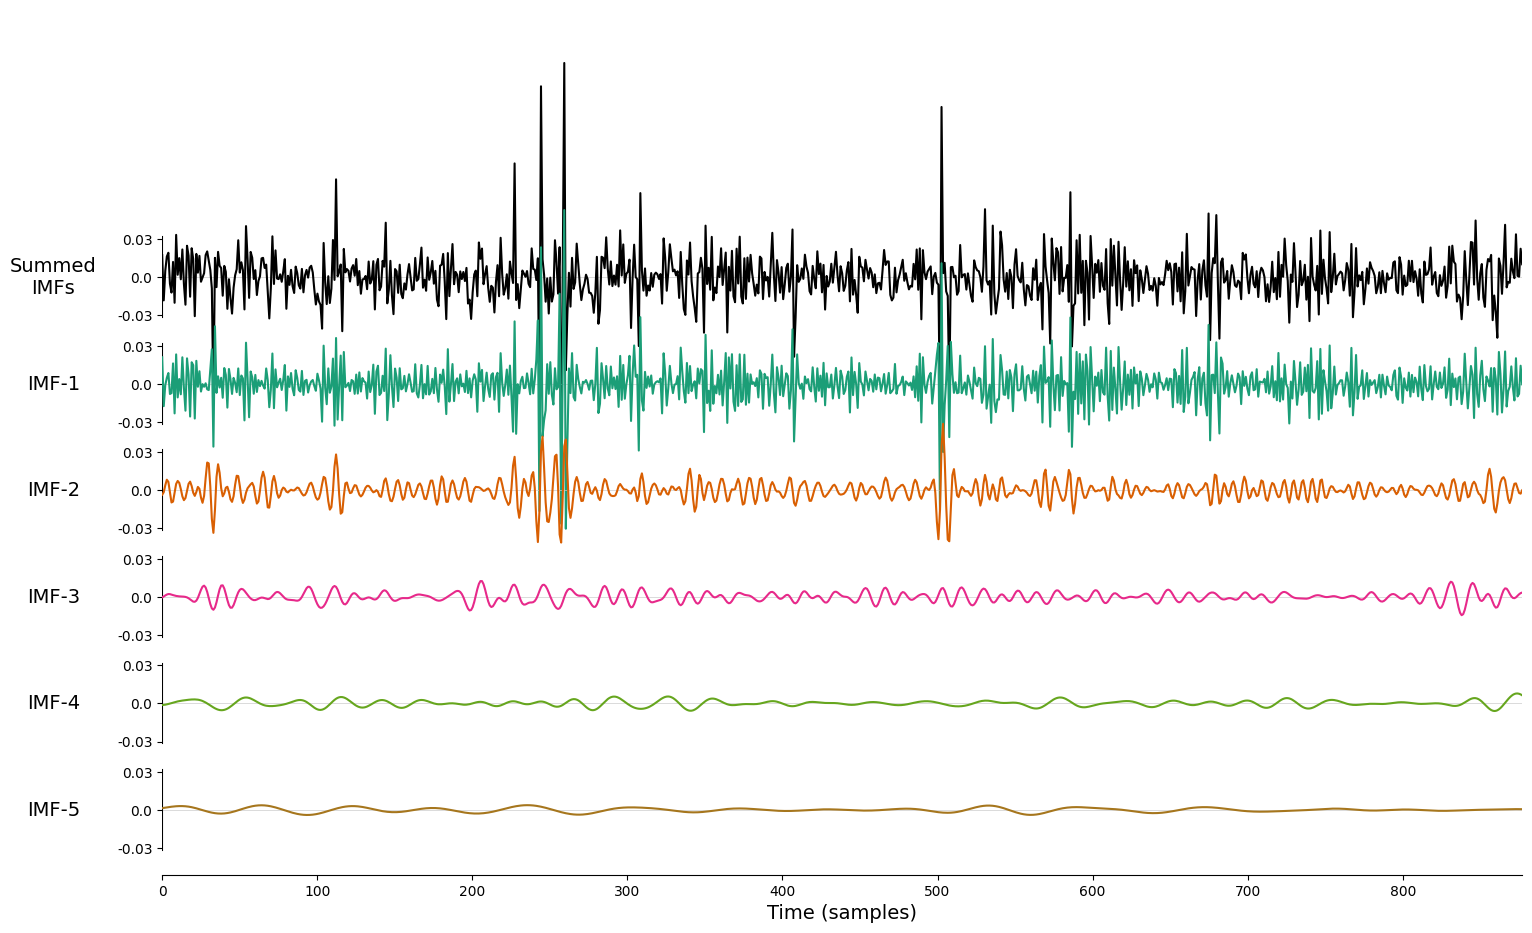

In [4]:
# Rodar uma mask sift

retornos = np.array(sorriso['Retornos'])
imf = emd.sift.mask_sift(retornos, max_imfs=5)

emd.plotting.plot_imfs(imf)
plt.show()

In [5]:
IP, IF, IA = emd.spectra.frequency_transform(imf, len(retornos), 'nht')

In [6]:
fase_imf1 = IP[:, 0]
fase_acm_imf1 = np.unwrap(fase_imf1)

## Fourier

In [7]:
# Calcular a Transformada de Fourier
n = len(retornos)
z = np.fft.fft(retornos)
freq = np.fft.fftfreq(n)

# Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
z[freq < 0] = 0

# Calcular a Transformada Inversa de Fourier
w = np.fft.ifft(z)

fase_fourier = np.angle(w)

fase_acm_fourier = np.unwrap(fase_fourier)

## Hilbert

In [8]:
sinal = hilbert(retornos)
fase_hilbert = np.angle(sinal)
fase_acm_hilbert = np.unwrap(fase_hilbert)

# Plot das fases

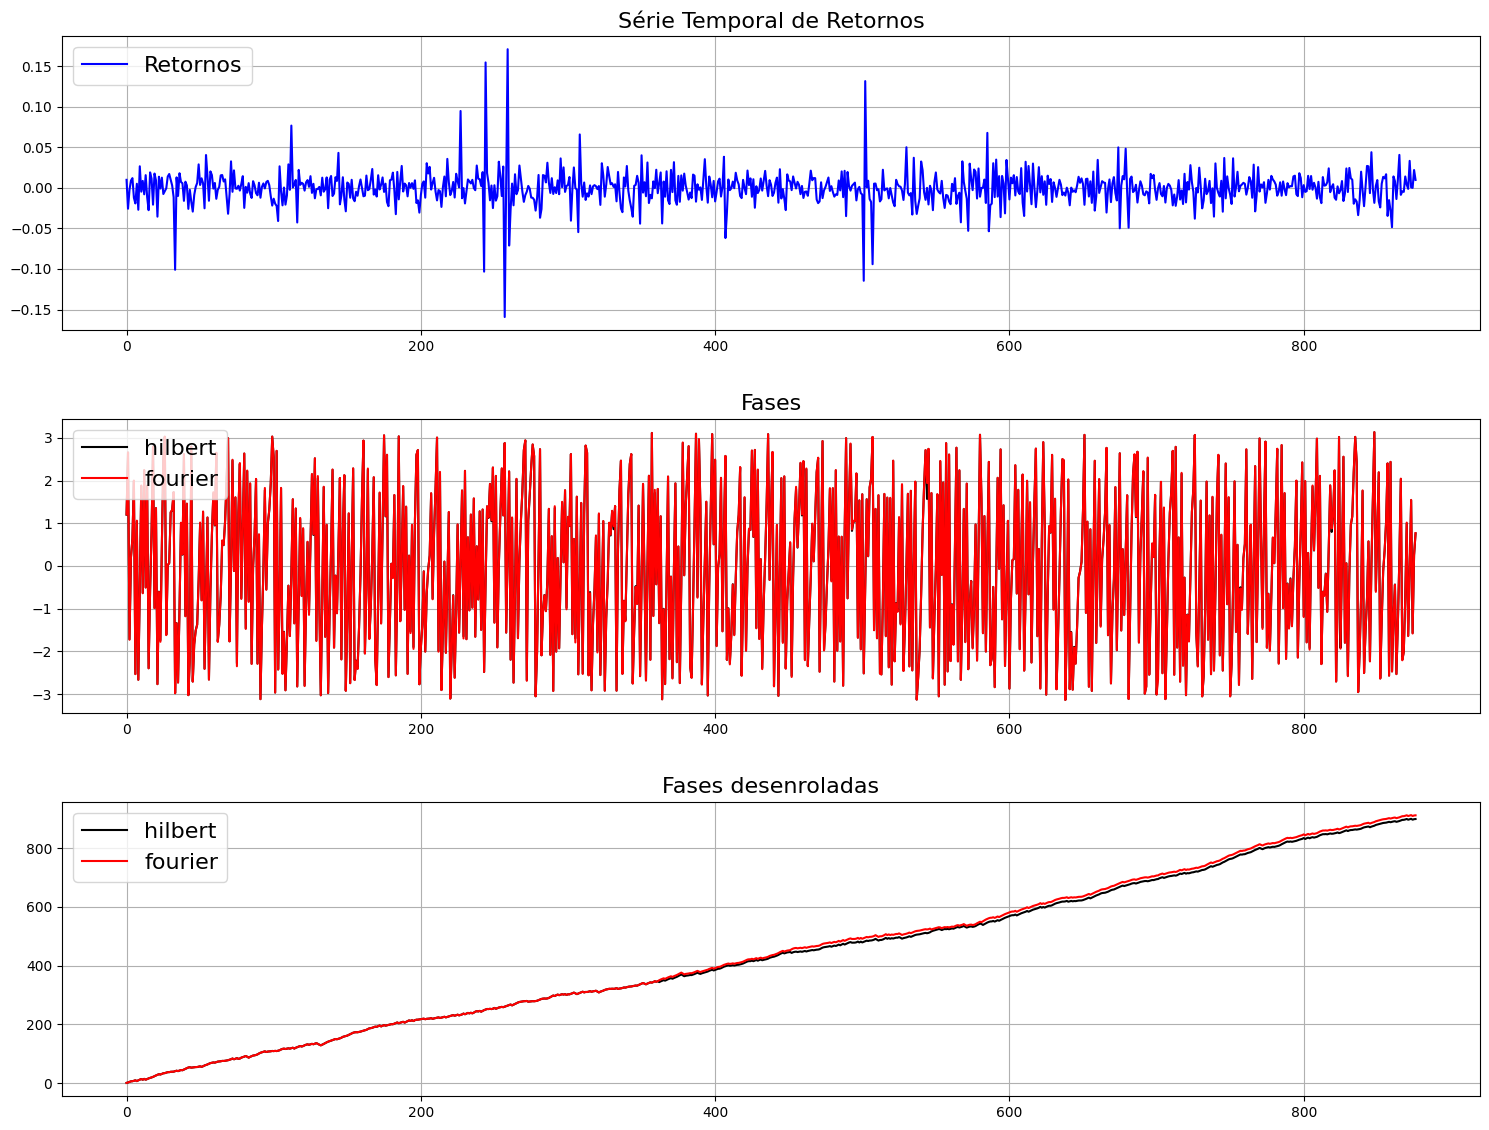

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Juntar as fases num DataFrame
fases_df = pd.DataFrame({
    'hilbert': fase_hilbert,
    'fourier': fase_fourier
})

fases_acm_df = pd.DataFrame({
    'hilbert': fase_acm_hilbert,
    'fourier': fase_acm_fourier
})

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# Primeiro subplot - Retornos
axes[0].plot(retornos, color='blue', label='Retornos')
axes[0].legend(loc='upper left', fontsize=16)
axes[0].grid(True)
axes[0].set_title('Série Temporal de Retornos', fontsize=16)

# Segundo subplot - Fases
axes[1].plot(fases_df['hilbert'], color='black', label='hilbert')
axes[1].plot(fases_df['fourier'], color='red', label='fourier')
axes[1].legend(loc='upper left', fontsize=16)
axes[1].grid(True)
axes[1].set_title('Fases', fontsize=16)

# Terceiro subplot - Fases desenroladas
axes[2].plot(fases_acm_df['hilbert'], color='black', label='hilbert')
axes[2].plot(fases_acm_df['fourier'], color='red', label='fourier')
axes[2].legend(loc='upper left', fontsize=16)
axes[2].grid(True)
axes[2].set_title('Fases desenroladas', fontsize=16)

# Ajustar o layout para que os subplots fiquem mais estreitos
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.subplots_adjust(hspace=0.3)  # Ajusta o espaçamento vertical entre os subplots

plt.show()


# Extração de frequências

## Fourier

In [122]:
%run C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Fatos_Estilizados\Funcoes.ipynb

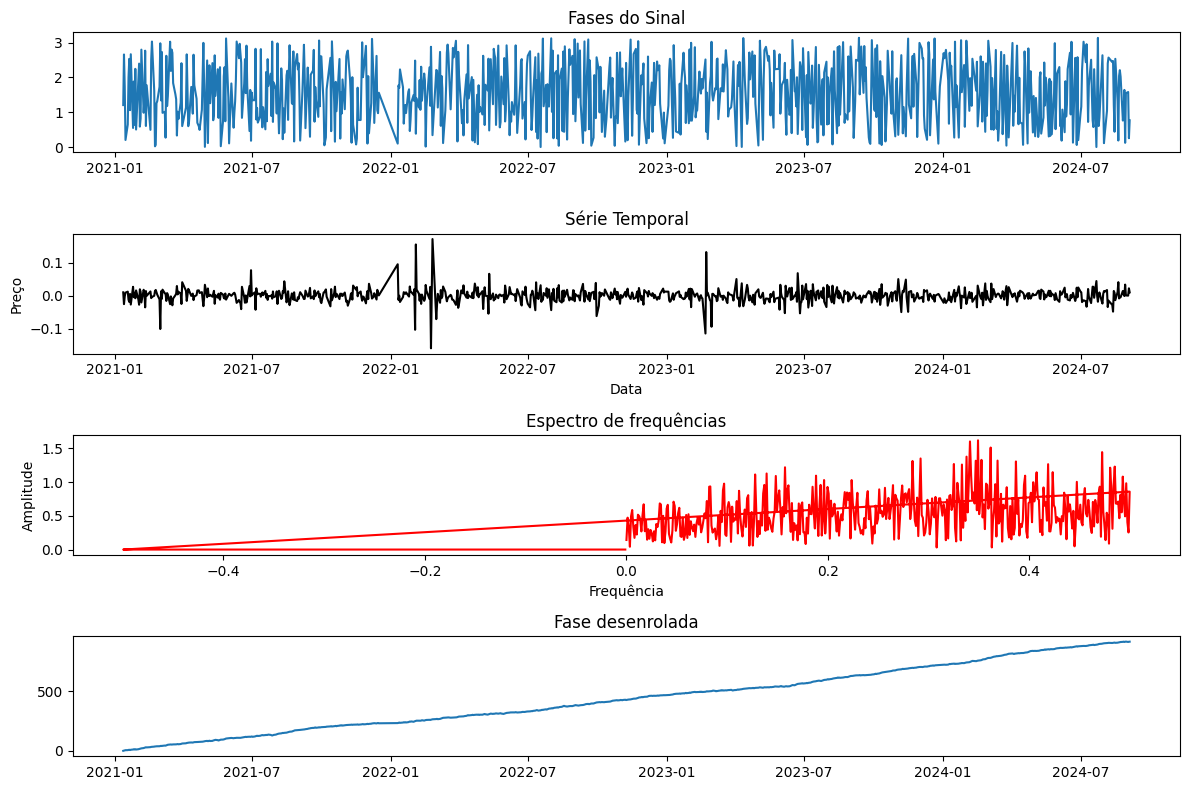

In [124]:
plot_FourierTranform(sorriso['Retornos'], freqEspectrum=True, phaseUnwrapped=True, xlimitsEspectrum=None)

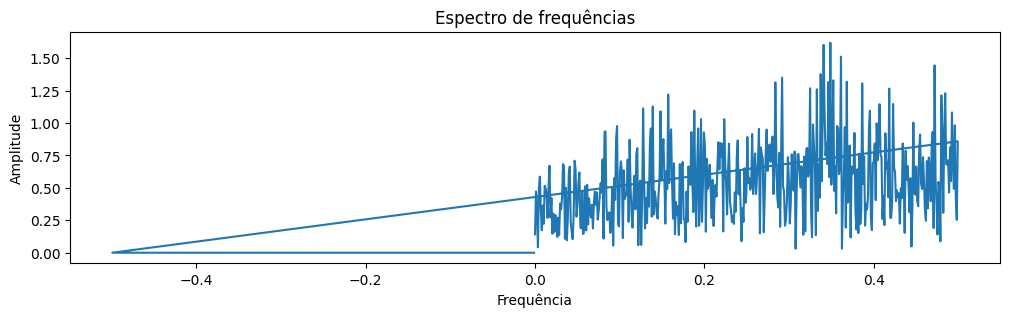

In [127]:
freq_fourier = np.fft.fftfreq(len(retornos))

fft = np.fft.fft(retornos)

fft[freq_fourier < 0] = 0

# Plotar o espectro de frequências
plt.figure(figsize=(12, 3))
plt.plot(freq_fourier, np.abs(fft))
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.title('Espectro de frequências')
plt.show()

## Hilbert-Huang

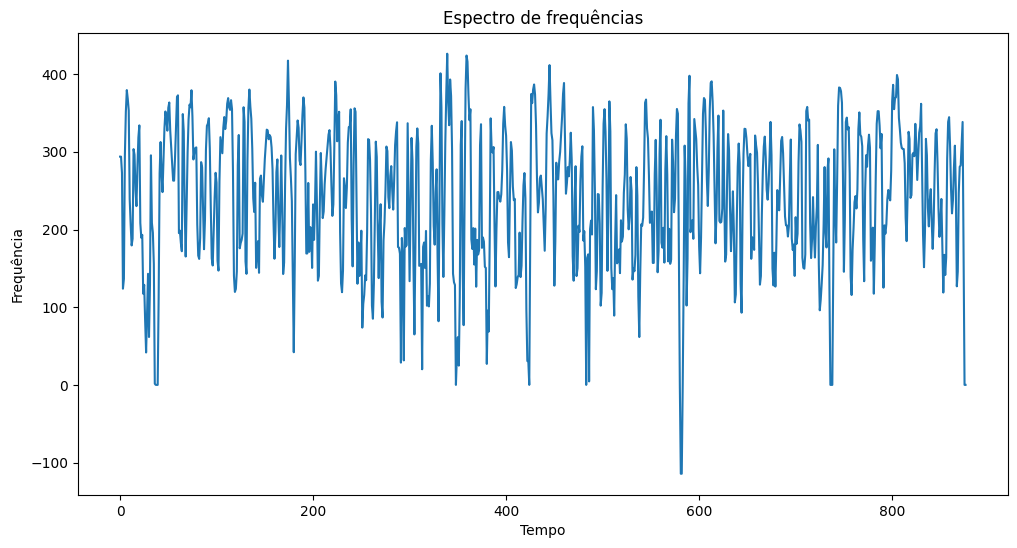

In [108]:
freq_hht = IF[:, 0]
amp_hht = IA[:, 0]

# Plotar o espectro de frequências
plt.figure(figsize=(12, 6))
plt.plot(freq_hht)
plt.xlabel('Tempo')
plt.ylabel('Frequência')
plt.title('Espectro de frequências')
plt.show()

## Hilbert

Text(0, 0.5, 'Frequency (cycles/day)')

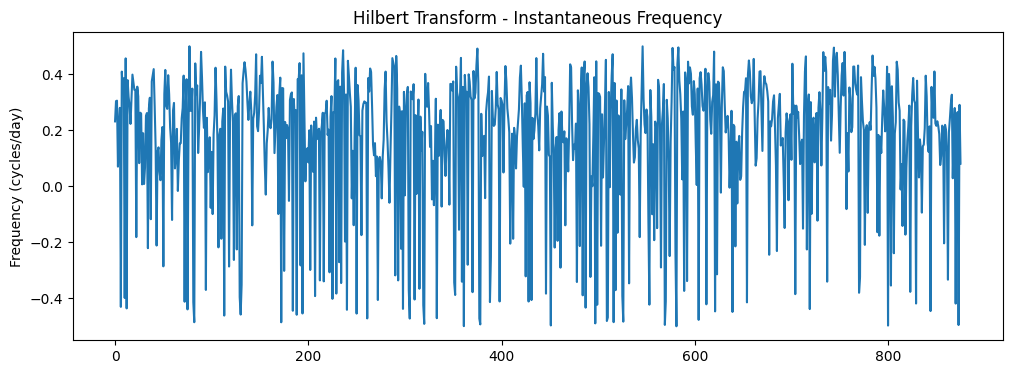

In [130]:
freq_hilb = np.diff(fase_acm_hilbert) / (2.0 * np.pi)

plt.figure(figsize=(12,4))
plt.plot(freq_hilb)
plt.title('Hilbert Transform - Instantaneous Frequency')
plt.ylabel('Frequency (cycles/day)')

# Plot dos retornos

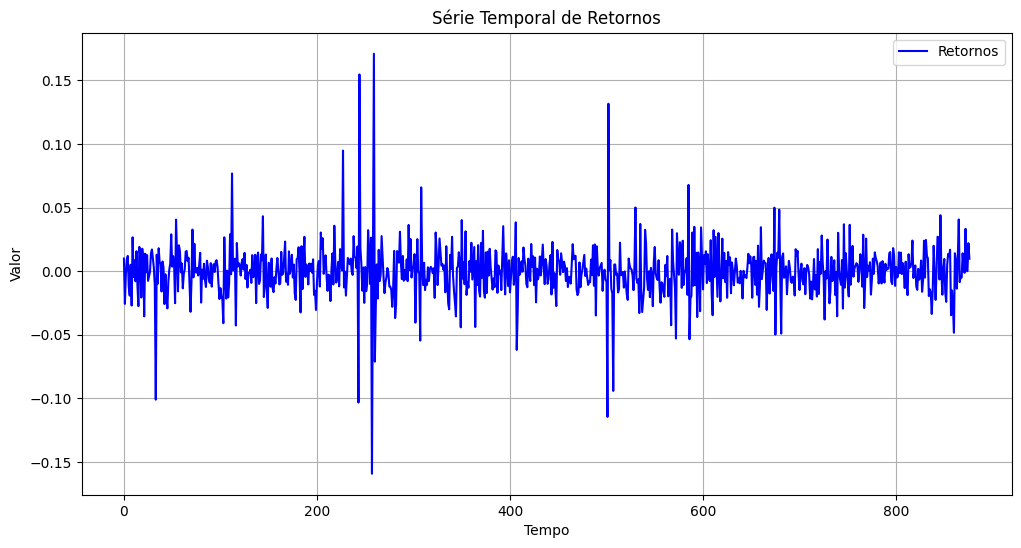

In [15]:
# Supondo que 'retornos' seja uma série temporal
plt.figure(figsize=(12, 6))
plt.plot(retornos, color='blue', label='Retornos')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Série Temporal de Retornos', fontsize=16)
plt.grid(True)
plt.show()

# Plot das fases da série temporal de preços

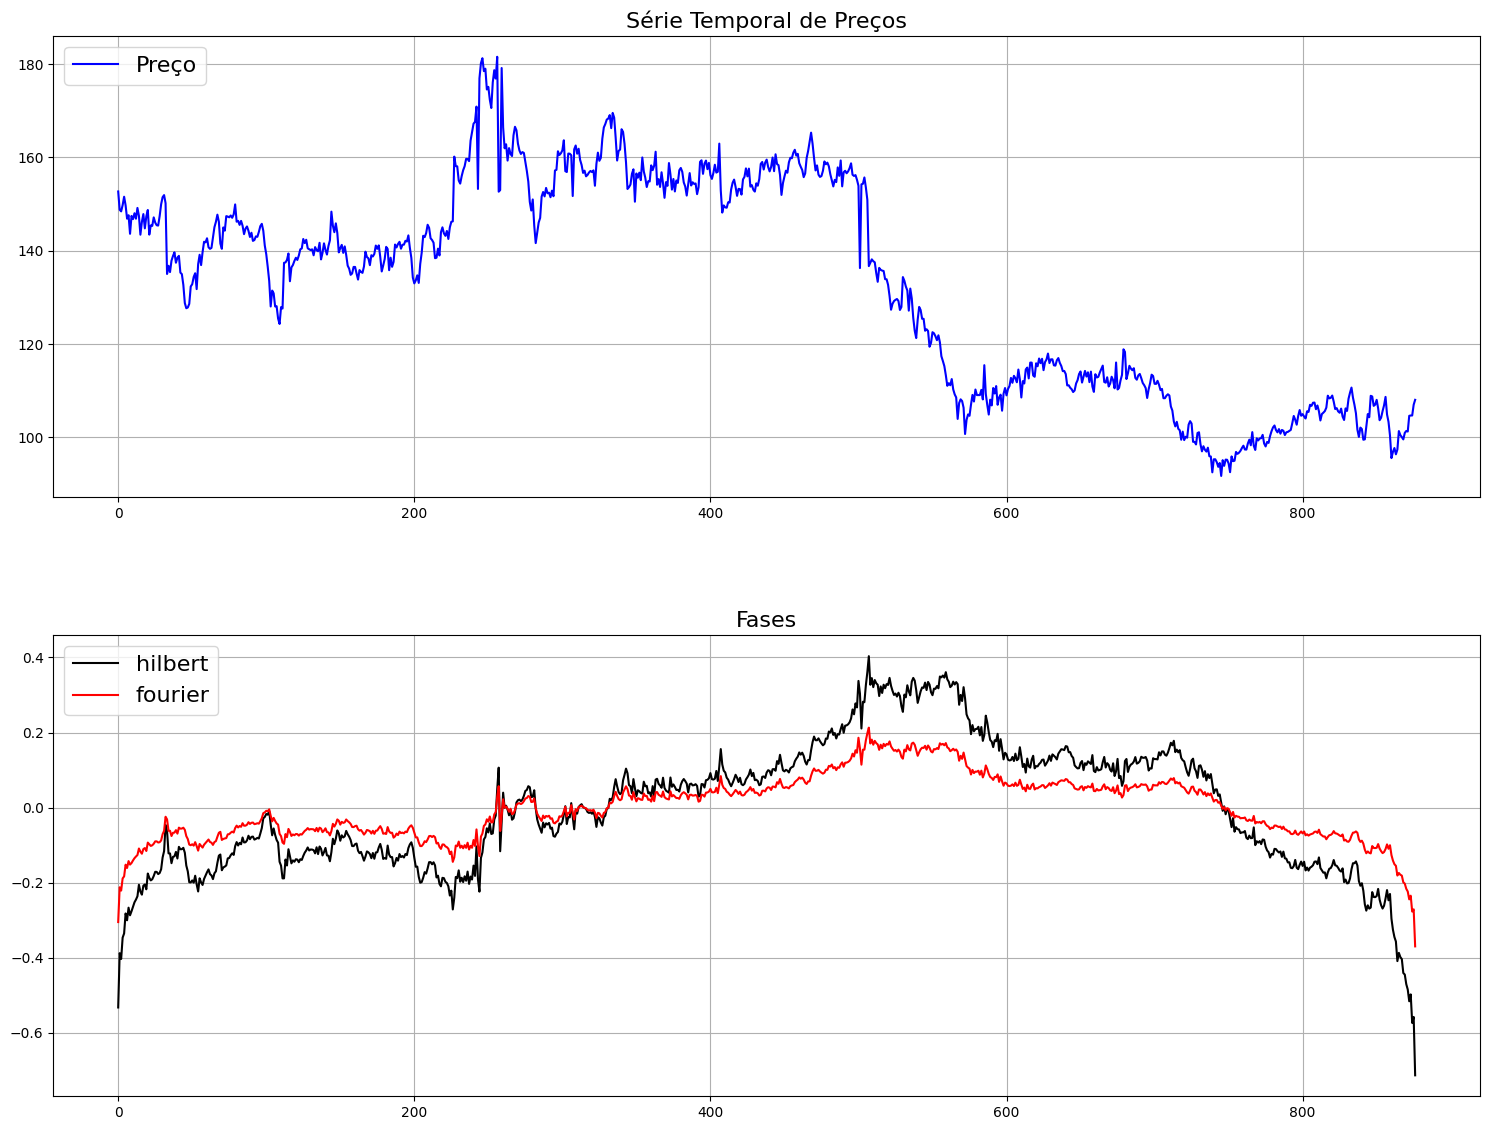

In [23]:
precos = np.array(sorriso['Preco'])
# Calcular a Transformada de Fourier
n = len(precos)
z = np.fft.fft(precos)
freq = np.fft.fftfreq(n)

# Zerar os valores com frequência negativa (apenas para considerar a parte positiva)
z[freq < 0] = 0

# Calcular a Transformada Inversa de Fourier
w = np.fft.ifft(z)

fase_fourier = np.angle(w)

fase_acm_fourier = np.unwrap(fase_fourier)

sinal = hilbert(precos)
fase_hilbert = np.angle(sinal)
fase_acm_hilbert = np.unwrap(fase_hilbert)

# Juntar as fases num DataFrame
fases_df = pd.DataFrame({
    'hilbert': fase_hilbert,
    'fourier': fase_fourier
})

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Primeiro subplot - Preços
axes[0].plot(precos, color='blue', label='Preço')
axes[0].legend(loc='upper left', fontsize=16)
axes[0].grid(True)
axes[0].set_title('Série Temporal de Preços', fontsize=16)

# Segundo subplot - Fases
axes[1].plot(fases_df['hilbert'], color='black', label='hilbert')
axes[1].plot(fases_df['fourier'], color='red', label='fourier')
axes[1].legend(loc='upper left', fontsize=16)
axes[1].grid(True)
axes[1].set_title('Fases', fontsize=16)

# Ajustar o layout para que os subplots fiquem mais estreitos
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.subplots_adjust(hspace=0.3)  # Ajusta o espaçamento vertical entre os subplots

plt.show()
